# About the dataset

##In Cotton Disease Dataset, there are 3 folders:
##1. train 
##2. validation
##3. Test
##In each folder, there are 4 folders:
##1.disease cotton leaf 
##2. disease cotton plant 
##3. fresh cotton leaf
##4. fresh cotton plant


In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Import libraries

In [ ]:
#import libraries
import keras
 #use to make multiple images  from one image
from keras.preprocessing.image import ImageDataGenerator 
#optimizer update the model in response to the output of the lossfunction
#computationally efficient,little memory requirement,use full for large data --> Adam
from tensorflow.keras.optimizers import Adam 
 # callback is basically an object that performs some actions the actions can be stop the trainingbeacuse we reached the enough validation accuracy
 #saves the model in certain interval
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [ ]:
keras.__version__


'2.8.0'

# Loading the train dataset

In [ ]:
train_data_path = "/content/drive/MyDrive/cotton/data/train"


# Loading the val dataset

In [ ]:
validation_data_path = "/content/drive/MyDrive/cotton/data/val"

In [ ]:
# Once image is generated Below function shows the images 

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [ ]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
#The flow_from_directory() method takes a path of a directory and generates batches of augmented data.
#flow_from_directory() used to read the images from a big numpy array and folders containing images.
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,#batch_size: No. of images to be yielded from the generator per batch
                                      class_mode='binary') 
 # since we use binary_crossentropy loss, we need binary labels

Found 1951 images belonging to 4 classes.


In [ ]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [ ]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)
 
# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 324 images belonging to 4 classes.


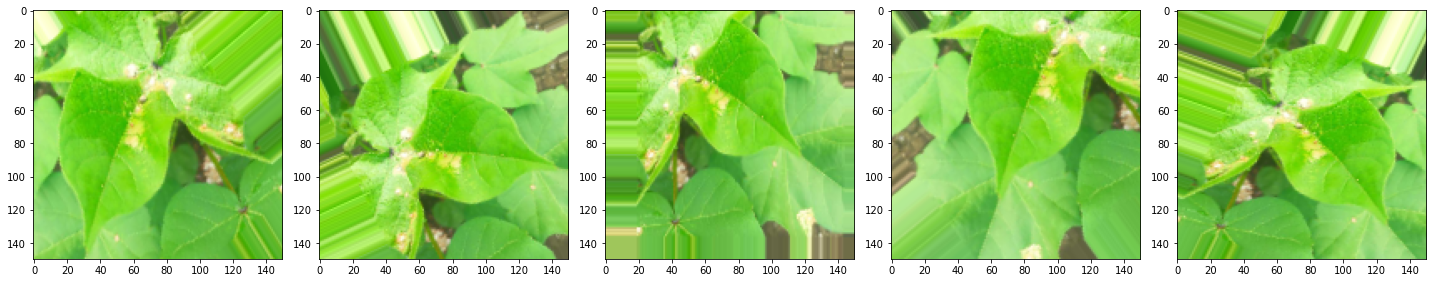

In [ ]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

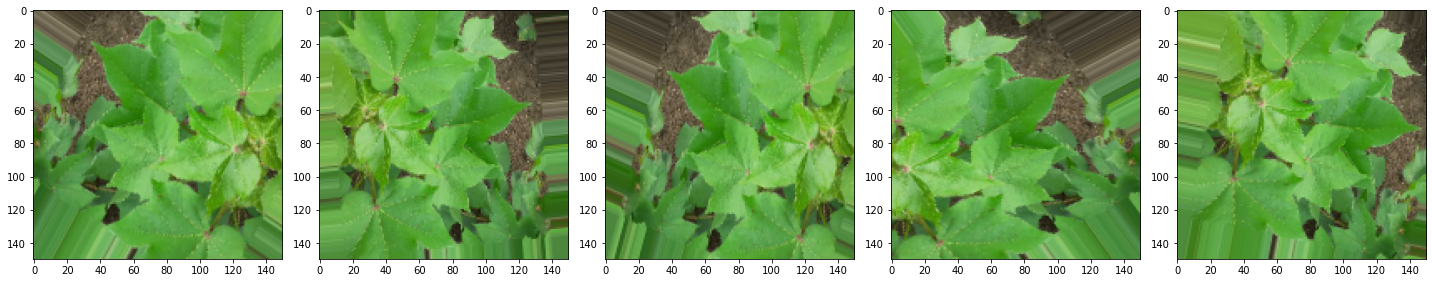

In [ ]:
images = [training_data[1][0][0] for i in range(5)]
plotImages(images)

# Saving The Best Model

In [ ]:
model_path = '/content/drive/MyDrive/cotton/v3_red_cott_dis.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Building CNN model

In [ ]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])
 
 
# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

# Train CNN Model

In [ ]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=500, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 16.06
 

Epoch 1/500
61/61 [==============================] - ETA: 0s - loss: 1.2364 - accuracy: 0.4285
Epoch 1: val_accuracy improved from -inf to 0.44753, saving model to /content/drive/MyDrive/cotton/v3_red_cott_dis.h5
61/61 [==============================] - 397s 6s/step - loss: 1.2364 - accuracy: 0.4285 - val_loss: 1.1167 - val_accuracy: 0.4475
Epoch 2/500
61/61 [==============================] - ETA: 0s - loss: 1.0454 - accuracy: 0.5572
Epoch 2: val_accuracy improved from 0.44753 to 0.63580, saving model to /content/drive/MyDrive/cotton/v3_red_cott_dis.h5
61/61 [==============================] - 27s 437ms/step - loss: 1.0454 - accuracy: 0.5572 - val_loss: 0.8813 - val_accuracy: 0.6358
Epoch 3/500
61/61 [==============================] - ETA: 0s - loss: 0.9419 - accuracy: 0.6202
Epoch 3: val_accuracy did not improve from 0.63580
61/61 [==============================] - 26s 431ms/step - loss: 0.9419 - accuracy: 0.6202 - val_loss: 0.9066 - val_accuracy: 0.6049
Epoch 4/500
61/61 [============